Import libraries 

In [1]:
import numpy as np #to handle matrices
import pandas as pd #to handle data
from matplotlib import pyplot as plt #for visualization
import datetime, pytz #to handle time
from sklearn.model_selection import train_test_split #for split data
from sklearn.ensemble import RandomForestRegressor #Random Forest Classifier
import warnings
warnings.filterwarnings("ignore")

Cambiamos el formato de la columna timestamp para visualizar la fecha y hora

In [2]:
def dateparse(time_in_secs):
     return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

Importamos dataset

In [3]:
df = pd.read_csv('btc_historical_data.csv',parse_dates=[0], date_parser=dateparse)
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 08:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 08:53:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 08:54:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 08:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 08:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A continuación, este fragmento detecta los valores faltantes para sustituirlos por un valor. En las columnas Volume_(BTC), Volume_(Currency), Weighted_Price los rellena con ceros; en las columnas Open, High, Low, Close utiliza el método "forward fill" para copiar el valor anterior más cercano cuando sea posible. 

In [4]:
df['Volume_(BTC)'].fillna(value=0, inplace=True)
df['Volume_(Currency)'].fillna(value=0, inplace=True)
df['Weighted_Price'].fillna(value=0, inplace=True)

df['Open'].fillna(method='ffill', inplace=True)
df['High'].fillna(method='ffill', inplace=True)
df['Low'].fillna(method='ffill', inplace=True)
df['Close'].fillna(method='ffill', inplace=True)
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 08:52:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 08:53:00+00:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00
2,2011-12-31 08:54:00+00:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00
3,2011-12-31 08:55:00+00:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00
4,2011-12-31 08:56:00+00:00,4.39,4.39,4.39,4.39,0.000000,0.0,0.00


El siguiente fragmento de código selecciona un rango de fechas, lo agrupa por día y luego muestra el primer registro de cada día en el DataFrame resultante 'daily_df'.

In [5]:
start = datetime.datetime(2009, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2020, 10, 17, 20, 0, 0, 0, pytz.UTC)

daily_df = df[(df['Timestamp'] >= start) & (df['Timestamp'] <= end)].groupby([pd.Grouper(key='Timestamp', freq='D')]).first().reset_index()
daily_df = daily_df.set_index('Timestamp')
daily_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 00:00:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2012-01-01 00:00:00+00:00,4.58,4.58,4.58,4.58,0.000000,0.0,0.00
2012-01-02 00:00:00+00:00,5.00,5.00,5.00,5.00,0.000000,0.0,0.00
2012-01-03 00:00:00+00:00,5.00,5.00,5.00,5.00,0.000000,0.0,0.00
2012-01-04 00:00:00+00:00,5.29,5.29,5.29,5.29,0.000000,0.0,0.00


Hacemos doublecheck para asegurar que tenemos todos los valores

In [6]:
daily_df['Volume_(BTC)'].fillna(value=0, inplace=True)
daily_df['Volume_(Currency)'].fillna(value=0, inplace=True)
daily_df['Weighted_Price'].fillna(value=0, inplace=True)

daily_df['Open'].fillna(method='ffill', inplace=True)
daily_df['High'].fillna(method='ffill', inplace=True)
daily_df['Low'].fillna(method='ffill', inplace=True)
daily_df['Close'].fillna(method='ffill', inplace=True)

print("Shape: ", daily_df.shape)
print("Columns = ", daily_df.columns)
print("Hay valores 'NaN': ", daily_df.isnull().values.any())
print("Hay valores duplicados en el índice: ", daily_df.index.duplicated().any())
daily_df.head()

Shape:  (3214, 7)
Columns =  Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')
Is there a value of 'NaN':  False
Are there any duplicate values:  False


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 00:00:00+00:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2012-01-01 00:00:00+00:00,4.58,4.58,4.58,4.58,0.000000,0.0,0.00
2012-01-02 00:00:00+00:00,5.00,5.00,5.00,5.00,0.000000,0.0,0.00
2012-01-03 00:00:00+00:00,5.00,5.00,5.00,5.00,0.000000,0.0,0.00
2012-01-04 00:00:00+00:00,5.29,5.29,5.29,5.29,0.000000,0.0,0.00


Agregamos historical data a la tabla

Este fragmento crea un nuevo DataFrame 'historical_df' que contiene en nuevas columnas el historico de los siete días anteriores en nuevas columnas para cada fila

In [7]:
historical_df = daily_df
for i in range(1,8): #para 7 dias
     historical_df["Open_b_"+str(i)] = daily_df['Open'].shift(i)
     historical_df["High_b_"+str(i)] = daily_df['High'].shift(i)
     historical_df["Low_b_"+str(i)] = daily_df['Low'].shift(i)
     historical_df["Close_b_"+str(i)]= daily_df['Close'].shift(i)
     historical_df["Volume_(BTC)_b_"+str(i)] = daily_df['Volume_(BTC)'].shift(i)
     historical_df["Volume_(Currency)_b_"+str(i)] = daily_df['Volume_(Currency)'].shift(i)

historical_df = historical_df.dropna() #elimina la primera fila
print("Historical Data Format: ", historical_df.shape)
historical_df.head()

Historical Data Format:  (3207, 49)


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_b_1,High_b_1,Low_b_1,...,Low_b_6,Close_b_6,Volume_(BTC)_b_6,Volume_(Currency)_b_6,Open_b_7,High_b_7,Low_b_7,Close_b_7,Volume_(BTC)_b_7,Volume_(Currency)_b_7
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-07 00:00:00+00:00,6.00,6.00,6.00,6.00,0.0,0.0,0.0,6.43,6.43,6.43,...,4.58,4.58,0.0,0.0,4.39,4.39,4.39,4.39,0.455581,2.0
2012-01-08 00:00:00+00:00,6.80,6.80,6.80,6.80,0.0,0.0,0.0,6.00,6.00,6.00,...,5.00,5.00,0.0,0.0,4.58,4.58,4.58,4.58,0.000000,0.0
2012-01-09 00:00:00+00:00,6.90,6.90,6.90,6.90,0.0,0.0,0.0,6.80,6.80,6.80,...,5.00,5.00,0.0,0.0,5.00,5.00,5.00,5.00,0.000000,0.0
2012-01-10 00:00:00+00:00,6.30,6.30,6.30,6.30,0.0,0.0,0.0,6.90,6.90,6.90,...,5.29,5.29,0.0,0.0,5.00,5.00,5.00,5.00,0.000000,0.0
2012-01-11 00:00:00+00:00,7.14,7.14,7.14,7.14,0.0,0.0,0.0,6.30,6.30,6.30,...,5.37,5.57,0.0,0.0,5.29,5.29,5.29,5.29,0.000000,0.0


Agregamos una columna "NEXT_CLOSE" al DataFrame que contiene los precios de cierre del día siguiente y luego elimina la última fila que contiene valores faltantes para asegurarse de que el conjunto de datos esté completo y listo para su uso en tareas de aprendizaje automático supervisado.

In [8]:
historical_df["NEXT_CLOSE"] = historical_df['Close'].shift(-1)
historical_df = historical_df.dropna() #elimina la ultima fila
print("after adding next CLOSE, new shape: ", historical_df.shape)
historical_df.head()

after adding next CLOSE, new shape:  (3206, 50)


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_b_1,High_b_1,Low_b_1,...,Close_b_6,Volume_(BTC)_b_6,Volume_(Currency)_b_6,Open_b_7,High_b_7,Low_b_7,Close_b_7,Volume_(BTC)_b_7,Volume_(Currency)_b_7,NEXT_CLOSE
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-07 00:00:00+00:00,6.00,6.00,6.00,6.00,0.0,0.0,0.0,6.43,6.43,6.43,...,4.58,0.0,0.0,4.39,4.39,4.39,4.39,0.455581,2.0,6.80
2012-01-08 00:00:00+00:00,6.80,6.80,6.80,6.80,0.0,0.0,0.0,6.00,6.00,6.00,...,5.00,0.0,0.0,4.58,4.58,4.58,4.58,0.000000,0.0,6.90
2012-01-09 00:00:00+00:00,6.90,6.90,6.90,6.90,0.0,0.0,0.0,6.80,6.80,6.80,...,5.00,0.0,0.0,5.00,5.00,5.00,5.00,0.000000,0.0,6.30
2012-01-10 00:00:00+00:00,6.30,6.30,6.30,6.30,0.0,0.0,0.0,6.90,6.90,6.90,...,5.29,0.0,0.0,5.00,5.00,5.00,5.00,0.000000,0.0,7.14
2012-01-11 00:00:00+00:00,7.14,7.14,7.14,7.14,0.0,0.0,0.0,6.30,6.30,6.30,...,5.57,0.0,0.0,5.29,5.29,5.29,5.29,0.000000,0.0,7.00


TRAIN and TEST Split

In [9]:
prediction_days = 140
df_train = historical_df[:len(historical_df) - prediction_days ]
df_test  = historical_df[ len(historical_df) - prediction_days:]

print("PERCENT test/total data = % ", (prediction_days/len(historical_df)) * 100)
print("train data form: ", df_train.shape)
print("test data form: ", df_test.shape)

training_set = df_train.values
X_train = training_set[0:len(training_set), 0:49]
y_train = training_set[0:len(training_set), 49].reshape(-1,1)

test_set = df_test.values
X_test = test_set[0:len(test_set), 0:49]
y_test = test_set[0:len(test_set), 49].reshape(-1,1)

df_train.head()

PERCENT test/total data = %  4.366812227074235
train data form:  (3066, 50)
test data form:  (140, 50)


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_b_1,High_b_1,Low_b_1,...,Close_b_6,Volume_(BTC)_b_6,Volume_(Currency)_b_6,Open_b_7,High_b_7,Low_b_7,Close_b_7,Volume_(BTC)_b_7,Volume_(Currency)_b_7,NEXT_CLOSE
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-01-07 00:00:00+00:00,6.00,6.00,6.00,6.00,0.0,0.0,0.0,6.43,6.43,6.43,...,4.58,0.0,0.0,4.39,4.39,4.39,4.39,0.455581,2.0,6.80
2012-01-08 00:00:00+00:00,6.80,6.80,6.80,6.80,0.0,0.0,0.0,6.00,6.00,6.00,...,5.00,0.0,0.0,4.58,4.58,4.58,4.58,0.000000,0.0,6.90
2012-01-09 00:00:00+00:00,6.90,6.90,6.90,6.90,0.0,0.0,0.0,6.80,6.80,6.80,...,5.00,0.0,0.0,5.00,5.00,5.00,5.00,0.000000,0.0,6.30
2012-01-10 00:00:00+00:00,6.30,6.30,6.30,6.30,0.0,0.0,0.0,6.90,6.90,6.90,...,5.29,0.0,0.0,5.00,5.00,5.00,5.00,0.000000,0.0,7.14
2012-01-11 00:00:00+00:00,7.14,7.14,7.14,7.14,0.0,0.0,0.0,6.30,6.30,6.30,...,5.57,0.0,0.0,5.29,5.29,5.29,5.29,0.000000,0.0,7.00


TRAIN MODEL: Random Forest

In [10]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 5)
rf.fit(X_train, np.ravel(y_train));
predictions = rf.predict(X_test)
#calculamos error absoluto
errors = np.sqrt(np.mean(np.square(predictions.reshape(-1,1) - y_test.reshape(-1,1) )))
#print root mean square error (rmse)
print('RMSE: ', errors)
print('R^2 Score - Coefficient of Determination', rf.score(X_test, y_test))

RMSE:  305.48037194321233
R^2 Score - Coefficient of Determination 0.8999530548131278


VISUALIZATION

In [11]:
df_Result = pd.DataFrame(y_test, index=df_test.index, columns=["NEXT_CLOSE"])
df_Result['Predicted'] = predictions
df_Result = df_Result.sort_values('Timestamp')
df_Result.head()

,NEXT_CLOSE,Predicted
Timestamp,,
2020-05-30 00:00:00+00:00,9485.28,9368.57333
2020-05-31 00:00:00+00:00,9468.21,9382.56108
2020-06-01 00:00:00+00:00,9668.40,9350.38891
2020-06-02 00:00:00+00:00,9531.93,9735.16401
2020-06-03 00:00:00+00:00,9581.76,9387.69808


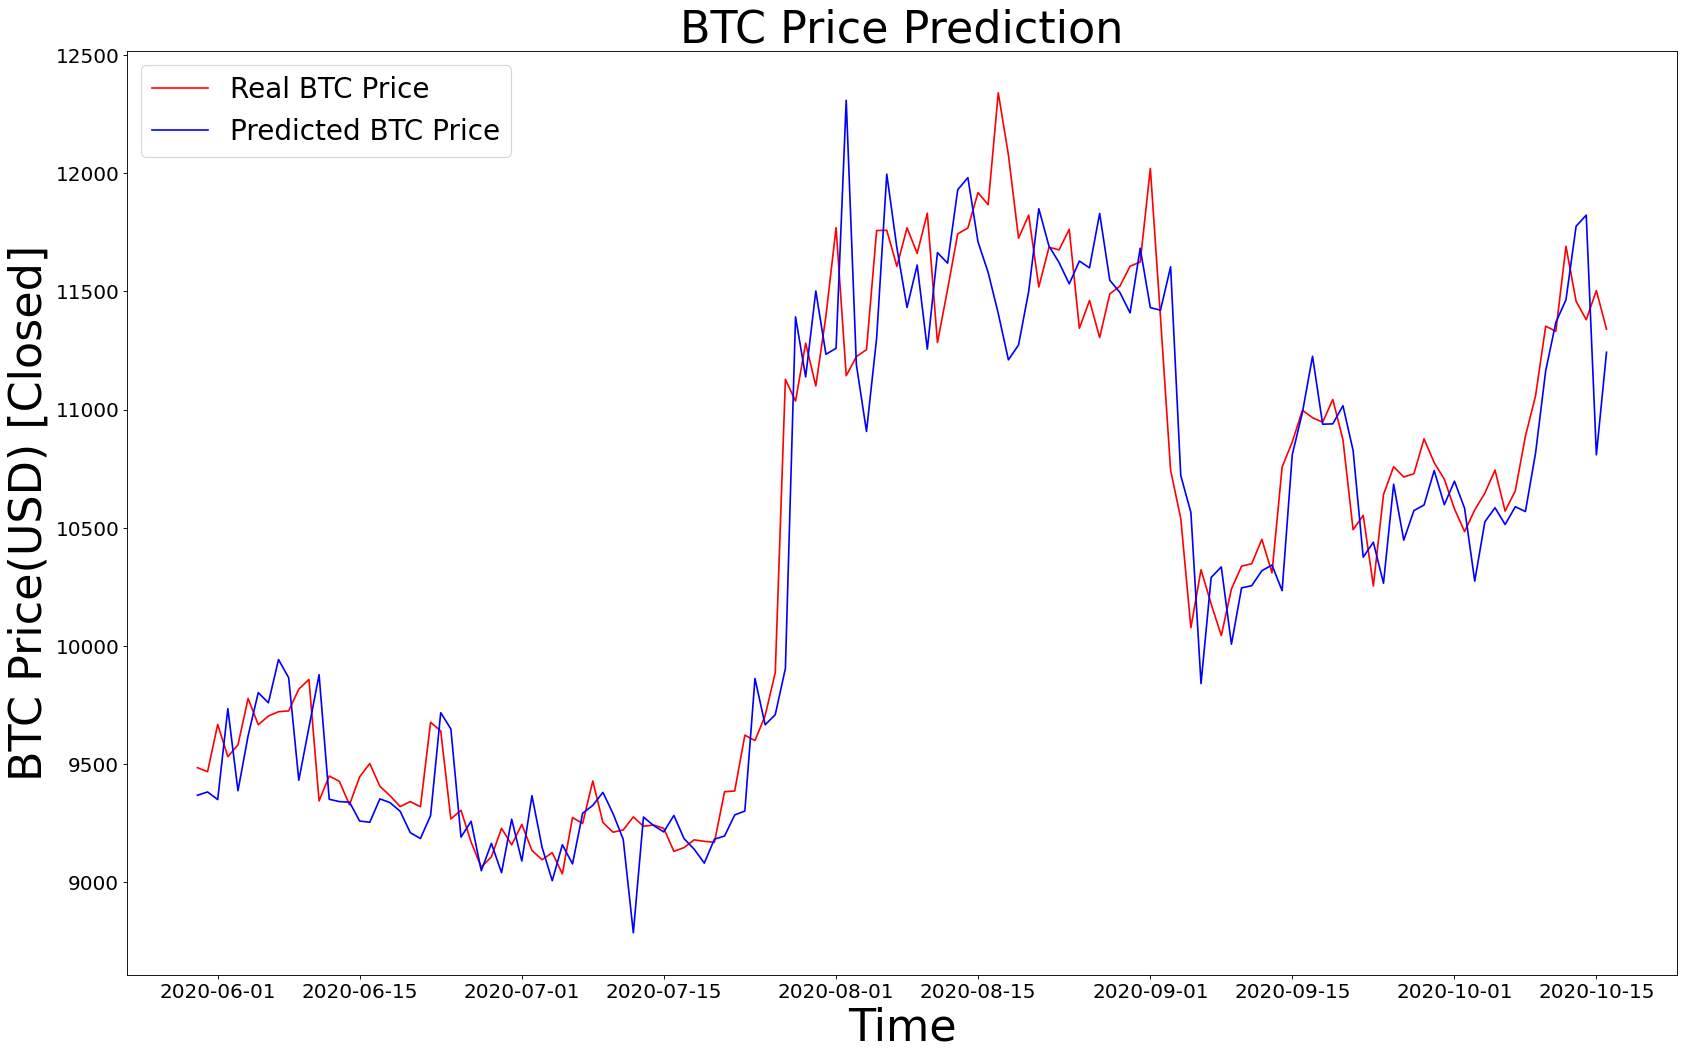

In [12]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(df_Result['NEXT_CLOSE'], color = 'red', label = 'Real BTC Price')
plt.plot(df_Result['Predicted'], color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_Result.reset_index()
x = df_test.index
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD) [Closed]', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()